In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import string

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

import nltk
from nltk.util import pr
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
data = pd.read_csv('labeled_data.csv')
# pd.set_option('display.max_colwidth',None)
data.head()

INDEX  count  hate_speech  offensive_language  neither  class  \
0      0      3            0                   0        3      2   
1      1      3            0                   3        0      1   
2      2      3            0                   3        0      1   
3      3      3            0                   2        1      1   
4      4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   INDEX               24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [4]:
data.isnull().sum()

INDEX                 0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [5]:
wordnet = WordNetLemmatizer()

In [6]:
def clean(text):
  text = str(text).lower()
  text = re.sub('[.?]', '', text)  # Remove punctuation (periods and question marks)
  text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
  text = re.sub('<.?>+', '', text)  # Remove HTML tags
  text = re.sub(r"[^\w\s]", '', text)  # Remove non-alphanumeric and non-whitespace characters
  text = re.sub('\n', '', text)  # Remove newline characters
  text = re.sub(r'\w\d\w', '', text)  # Optional removal of words with digit in middle
  text = [wordnet.lemmatize(word) for word in text.split(' ') if word not in set(stopwords.words('english'))]
  text = " ".join(text)
  return text

In [7]:
data['tweet'] = data['tweet'].apply(clean)

In [8]:
data['tweet'][0]

' rt mayasolovely woman shouldnt complain cleaning house amp man always take trash'

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data['tweet'], data['class'], test_size=0.3, random_state=42)

In [10]:
tfidf_vectorizer = TfidfVectorizer() 

In [11]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [12]:
print(X_train_tfidf)

  (np.int32(0), np.int32(5284))	0.18308416642501968
  (np.int32(0), np.int32(12534))	0.30357698244083475
  (np.int32(0), np.int32(10318))	0.135332718823019
  (np.int32(0), np.int32(6066))	0.2611767705056346
  (np.int32(0), np.int32(11781))	0.24110431614963945
  (np.int32(0), np.int32(4597))	0.5967193948009766
  (np.int32(0), np.int32(5223))	0.2830620987962762
  (np.int32(0), np.int32(12206))	0.24799519580453708
  (np.int32(0), np.int32(7984))	0.32703679734367036
  (np.int32(0), np.int32(7276))	0.2898538704488166
  (np.int32(0), np.int32(10921))	0.20246857572253701
  (np.int32(1), np.int32(13119))	0.3826138123799423
  (np.int32(1), np.int32(21004))	0.39194283154346016
  (np.int32(1), np.int32(18425))	0.3206719947758368
  (np.int32(1), np.int32(19056))	0.14603554511379885
  (np.int32(1), np.int32(11362))	0.33668384920646305
  (np.int32(1), np.int32(3708))	0.42092141189004956
  (np.int32(1), np.int32(7787))	0.3749914487165703
  (np.int32(1), np.int32(16771))	0.24940115800821352
  (np.int3

In [13]:
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [14]:
print(X_test_tfidf)

  (np.int32(0), np.int32(3773))	0.16051507812220658
  (np.int32(0), np.int32(4849))	0.4530863515207262
  (np.int32(0), np.int32(10318))	0.34281034942835503
  (np.int32(0), np.int32(15923))	0.6963469410532885
  (np.int32(0), np.int32(26445))	0.40808046972575873
  (np.int32(1), np.int32(3051))	0.2795628613122017
  (np.int32(1), np.int32(3773))	0.1089794602414198
  (np.int32(1), np.int32(9650))	0.27521699928183585
  (np.int32(1), np.int32(10254))	0.34261483432168977
  (np.int32(1), np.int32(11408))	0.4390251922176926
  (np.int32(1), np.int32(13667))	0.46875908220179047
  (np.int32(1), np.int32(14407))	0.32575859868937823
  (np.int32(1), np.int32(16088))	0.318277835797285
  (np.int32(1), np.int32(16662))	0.28233517167197425
  (np.int32(1), np.int32(20187))	0.13125536689250392
  (np.int32(2), np.int32(1020))	0.3607873271564993
  (np.int32(2), np.int32(1957))	0.16867724981426938
  (np.int32(2), np.int32(6392))	0.3461896808020725
  (np.int32(2), np.int32(8057))	0.3745581366897959
  (np.int32(

In [15]:
svm_classifier = SVC(kernel='linear')

In [16]:
svm_classifier.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [17]:
y_pred = svm_classifier.predict(X_test_tfidf)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9030262273032952


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.21      0.31       427
           1       0.93      0.96      0.94      5747
           2       0.84      0.88      0.86      1261

    accuracy                           0.90      7435
   macro avg       0.78      0.68      0.70      7435
weighted avg       0.89      0.90      0.89      7435



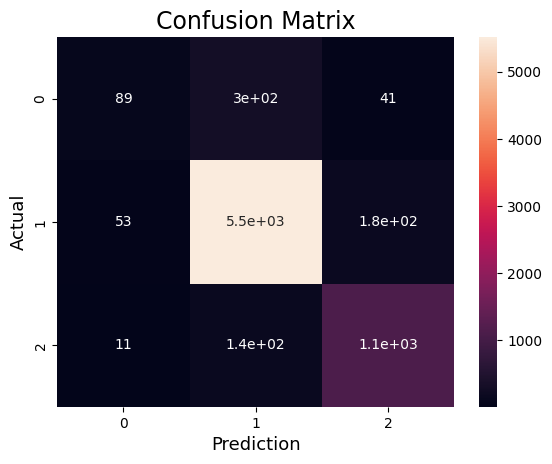

In [20]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [21]:
f1 = f1_score(y_test, y_pred, average=None)
print(f1)

[0.30689655 0.9428254  0.85670143]


In [22]:
i = 'i very happy'
i = tfidf_vectorizer.transform([i]).toarray()
print(svm_classifier.predict(i))

[1]
